In [1]:
import numpy as np
import pandas as pd

#Visualisation Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

In [2]:
#from google.colab import files
#od = files.upload()

In [3]:
#import io
#of = pd.read_csv(io.BytesIO(od['weatherAUS.csv']))


In [4]:
#Read dataset

df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
#Dimensions of dfset
df.shape

(145460, 23)

In [6]:
#dfset contains both categorical and continuous values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#Columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
#Finding categorical variables
cat_var = [var for var in df.columns if df[var].dtype=='O']
print('No.of Categorical values :',len(cat_var))
print('Categorical variables in the dfset are :', cat_var)

No.of Categorical values : 7
Categorical variables in the dfset are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
#Diaplying categorical variables
#RainTomorrow is our Target variable
df[cat_var].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [10]:
#Cardinality of Categorical variables
for catvar in cat_var:
    print(catvar, ' - ', len(df[catvar].unique()), ' labels')

Date  -  3436  labels
Location  -  49  labels
WindGustDir  -  17  labels
WindDir9am  -  17  labels
WindDir3pm  -  17  labels
RainToday  -  3  labels
RainTomorrow  -  3  labels


In [11]:
#Identifying missing values in Categorical variables
# 5 Features - windGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow contains null values
df[cat_var].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [12]:
# Creating a Data Quality Report for Categorical Features

desc = ['The date of observation', 'The common name of the location of the weather station', 'The direction of the strongest wind gust in the 24 hours to midnight', 'Direction of the wind at 9am','Direction of the wind at 3pm','1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0','The amount of next day rain in mm.']

dqr_df_cat = pd.DataFrame(columns = ['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode','2nd Mode Freq.','2nd Mode Perc' , 'Notes'])

count = 0
for col in cat_var:
    vals = df[col].value_counts().index.tolist()
    dqr_df_cat.loc[len(dqr_df_cat)] = [df[col].name, desc[count], df[col].count(), ((df.shape[0] - df[col].count()) / df.shape[0])*100, len(df[col].unique()), vals[0] ,df[col].value_counts()[0], df[col].value_counts(normalize = True)[0]*100 , vals[1], df[col].value_counts()[1], df[col].value_counts(normalize = True)[1]*100 , '']
    count += 1

# Data Quality Report for Categorical Features

In [13]:
dqr_df_cat

,Feature,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc,Notes
0,Date,The date of observation,145460,0.000000,3436,2013-11-12,49,0.033686,2014-09-01,49,0.033686,
1,Location,The common name of the location of the weather...,145460,0.000000,49,Canberra,3436,2.362161,Sydney,3344,2.298914,
2,WindGustDir,The direction of the strongest wind gust in th...,135134,7.098859,17,W,9915,7.337162,SE,9418,6.969379,
3,WindDir9am,Direction of the wind at 9am,134894,7.263853,17,N,11758,8.716474,SE,9287,6.884665,
4,WindDir3pm,Direction of the wind at 3pm,141232,2.906641,17,SE,10838,7.673898,W,10110,7.158434,
5,RainToday,1 if precipitation (mm) in the 24 hours to 9am...,142199,2.241853,3,No,110319,77.580714,Yes,31880,22.419286,
6,RainTomorrow,The amount of next day rain in mm.,142193,2.245978,3,No,110316,77.581878,Yes,31877,22.418122,


In [14]:
#Finding Continuous variables
cont_var = [var for var in df.columns if df[var].dtype!='O']
print('No.of Continuous values :',len(cont_var))
print('Coninuous variables in the dfset are :', cont_var)

No.of Continuous values : 16
Coninuous variables in the dfset are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [15]:
#Displying Continuous variables
df[cont_var].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [16]:
#Identifying missing values in Continuous variables
# 5 Features - windGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow contains null values
df[cont_var].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [17]:
dqr_df_cont = pd.DataFrame(columns = ['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Min.', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.', 'Notes'])

desc1 =['The minimum temperature in degrees celsius', 'The maximum temperature in degrees celsius','The amount of rainfall recorded for the day in mm','The so-called Class A pan evaporation (mm) in the 24 hours to 9am','The number of hours of bright sunshine in the day.','The speed (km/h) of the strongest wind gust in the 24 hours to midnight','Wind speed (km/hr) averaged over 10 minutes prior to 9am','Wind speed (km/hr) averaged over 10 minutes prior to 3pm','Humidity (percent) at 9am','Humidity (percent) at 3pm','Atmospheric pressure (hpa) reduced to mean sea level at 9am','Atmospheric pressure (hpa) reduced to mean sea level at 3pm','Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.','Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm.','Temperature (degrees C) at 9am','Temperature (degrees C) at 3pm']

count = 0
for col in cont_var:
    vals = df[col].value_counts().index.tolist()
    dqr_df_cont.loc[len(dqr_df_cont)] = [df[col].name, desc1[count], df[col].count(), ((df.shape[0] - df[col].count()) / df.shape[0])*100, len(df[col].unique()), df[col].min() , df[col].describe()['25%'],df[col].describe()['50%'],df[col].describe()['75%'], df[col].max(), df[col].describe()['mean'], df[col].describe()['std'] , '']
    count += 1

# Data Quality Report for Continuous Variables

In [18]:
dqr_df_cont

,Feature,Desc.,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.,Notes
0,MinTemp,The minimum temperature in degrees celsius,143975,1.020899,390,-8.5,7.6,12.0,16.9,33.9,12.194034,6.398495,
1,MaxTemp,The maximum temperature in degrees celsius,144199,0.866905,506,-4.8,17.9,22.6,28.2,48.1,23.221348,7.119049,
2,Rainfall,The amount of rainfall recorded for the day in mm,142199,2.241853,682,0.0,0.0,0.0,0.8,371.0,2.360918,8.478060,
3,Evaporation,The so-called Class A pan evaporation (mm) in ...,82670,43.166506,359,0.0,2.6,4.8,7.4,145.0,5.468232,4.193704,
4,Sunshine,The number of hours of bright sunshine in the ...,75625,48.009762,146,0.0,4.8,8.4,10.6,14.5,7.611178,3.785483,
5,WindGustSpeed,The speed (km/h) of the strongest wind gust in...,135197,7.055548,68,6.0,31.0,39.0,48.0,135.0,40.035230,13.607062,
6,WindSpeed9am,Wind speed (km/hr) averaged over 10 minutes pr...,143693,1.214767,44,0.0,7.0,13.0,19.0,130.0,14.043426,8.915375,
7,WindSpeed3pm,Wind speed (km/hr) averaged over 10 minutes pr...,142398,2.105046,45,0.0,13.0,19.0,24.0,87.0,18.662657,8.809800,
8,Humidity9am,Humidity (percent) at 9am,142806,1.824557,102,0.0,57.0,70.0,83.0,100.0,68.880831,19.029164,
9,Humidity3pm,Humidity (percent) at 3pm,140953,3.098446,102,0.0,37.0,52.0,66.0,100.0,51.539116,20.795902,


# Handling of Missing Values and Outliers

In [19]:
# Checking for Missing Values before Imputation in Categorical Features
df[cat_var].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [20]:
# Missing value Imputation in Categorical Features using Mode (Mode Imputation)
df['WindGustDir']= df['WindGustDir'].fillna( df['WindGustDir'].mode()[0])
df['WindDir9am']= df['WindDir9am'].fillna( df['WindDir9am'].mode()[0])
df['WindDir3pm']= df['WindDir3pm'].fillna( df['WindDir3pm'].mode()[0])
df['RainToday']= df['RainToday'].fillna( df['RainToday'].mode()[0])
df['RainTomorrow']= df['RainTomorrow'].fillna( df['RainTomorrow'].mode()[0])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [21]:
# Checking for Missing Values after Imputation in Categorical Features
df[cat_var].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [22]:
#Checking for Missing Values before Imputation in Continuous Features
df[cont_var].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [23]:
#Imputing Missing Values in Continuous Variables with Median (Median Imputation)

for col in cont_var:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True) 

In [24]:
#Checking for Missing Values before Imputation in Continuous Features
df[cont_var].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

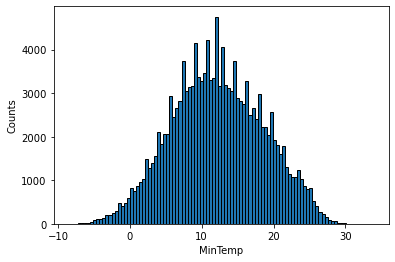

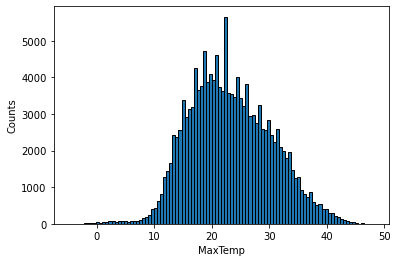

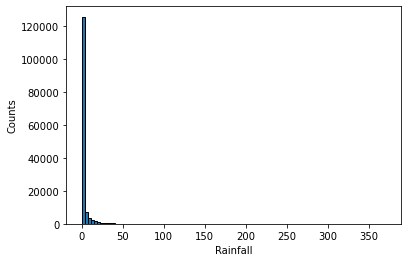

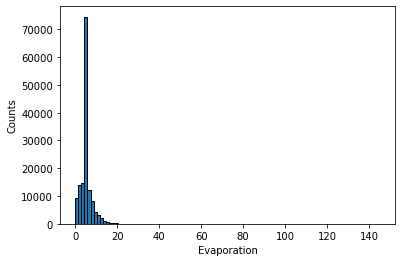

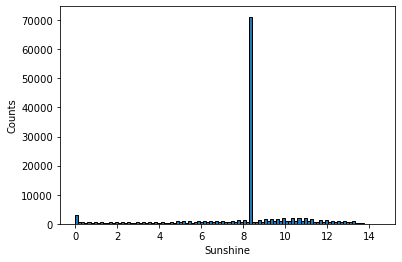

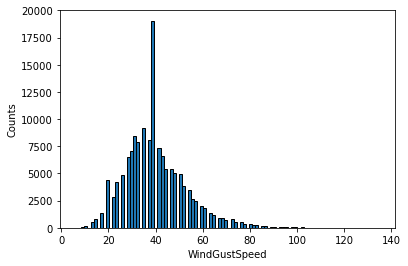

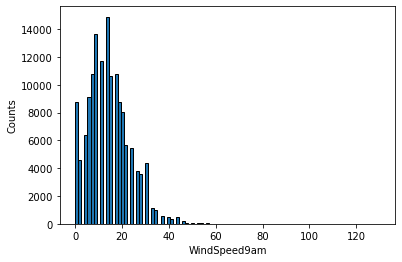

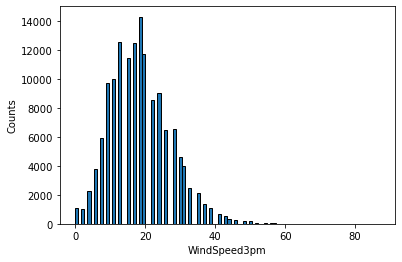

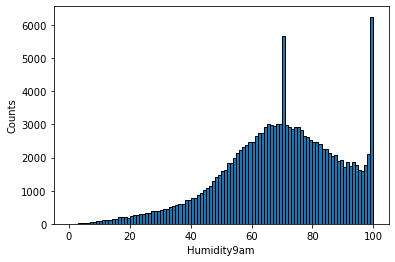

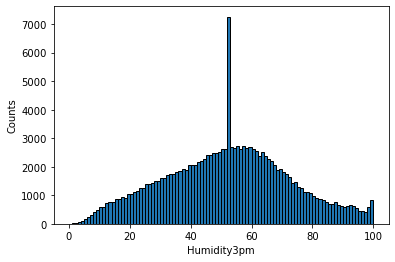

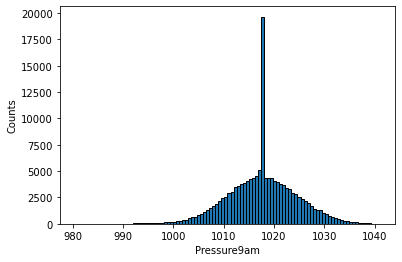

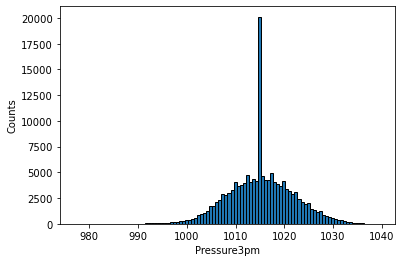

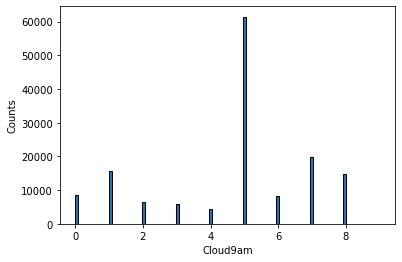

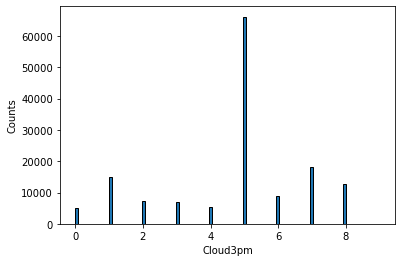

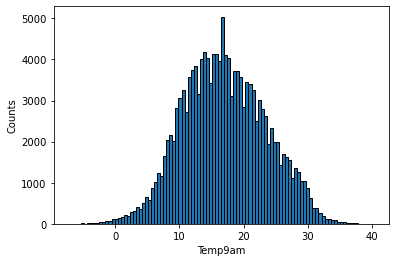

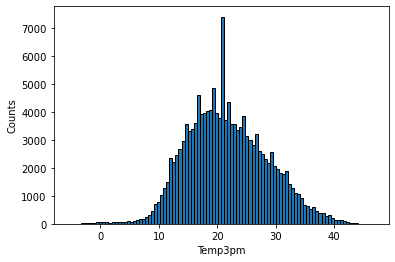

In [25]:
# Visualizing Continuous Features to check for Outliers
for x in df[cont_var]:
  plt.hist(df[x], bins = 100, edgecolor='black')
  plt.xlabel(x)
  plt.ylabel("Counts")
  plt.show()

In [26]:
# Checking for Outliers
print(round(df[cont_var].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  145460.0  145460.0  145460.0     145460.0  145460.0       145460.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          5.0       9.0           46.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      145460.0      145460.0     145460.0     145460.0     145460.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         20.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

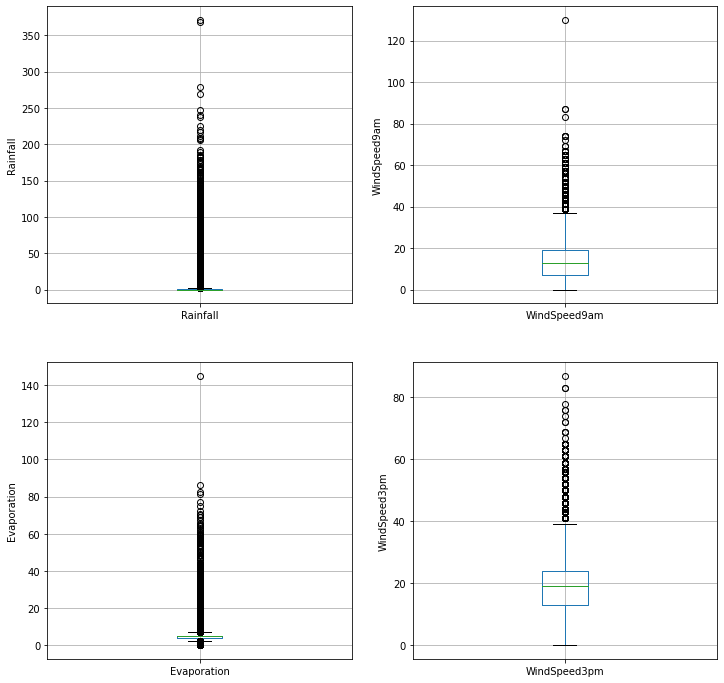

In [27]:
#Visualizing outliers
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [28]:
df_continuous=df[["Rainfall","Evaporation","WindSpeed9am","WindSpeed3pm"]]
df_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Rainfall      145460 non-null  float64
 1   Evaporation   145460 non-null  float64
 2   WindSpeed9am  145460 non-null  float64
 3   WindSpeed3pm  145460 non-null  float64
dtypes: float64(4)
memory usage: 4.4 MB


In [29]:
#Identifying the Outliers
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Low_bound = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_bound = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall IQR range is: {lowerboundary} and {upperboundary}'.format(lowerboundary=Low_bound, upperboundary=Upper_bound))

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Low_bound = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_bound = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation IQR range is: {lowerboundary} and {upperboundary}'.format(lowerboundary=Low_bound, upperboundary=Upper_bound))

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lowe_bound = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_bound = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am IQR range is: {lowerboundary} and {upperboundary}'.format(lowerboundary=Low_bound, upperboundary=Upper_bound))

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_bound = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_bound = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm IQR range is: {lowerboundary} and {upperboundary}'.format(lowerboundary=Low_bound, upperboundary=Upper_bound))

Rainfall IQR range is: -1.7999999999999998 and 2.4
Evaporation IQR range is: 0.39999999999999947 and 8.8
WindSpeed9am IQR range is: 0.39999999999999947 and 55.0
WindSpeed3pm IQR range is: 0.39999999999999947 and 57.0


In [30]:
# Clamping the Outliers to the Upper and Lower bounds as calculated by IQR method above
df['Rainfall'].clip(upper = 3.2, inplace = True)
df['Rainfall'].clip(lower = -2.4000000000000004, inplace = True)

df['Evaporation'].clip(upper = 21.800000000000004, inplace = True)
df['Evaporation'].clip(lower = -11.800000000000002, inplace = True)

df['WindSpeed9am'].clip(upper = 55.0, inplace = True)
df['WindSpeed9am'].clip(lower = -11.800000000000002, inplace = True)

df['WindSpeed3pm'].clip(upper = 57.0, inplace = True)
df['WindSpeed3pm'].clip(lower = -11.800000000000002, inplace = True)


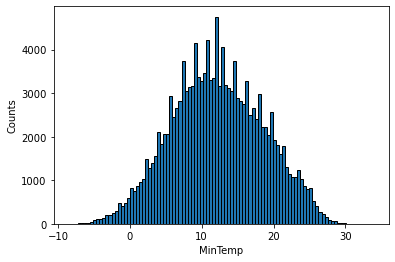

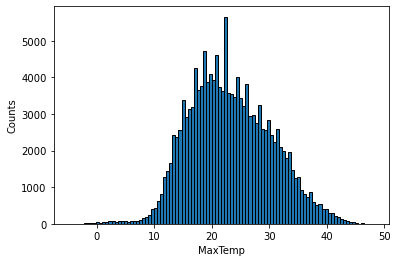

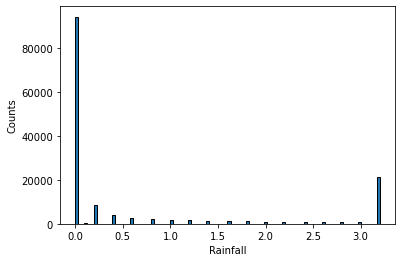

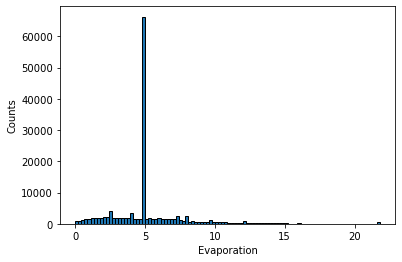

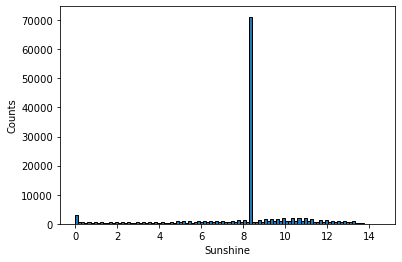

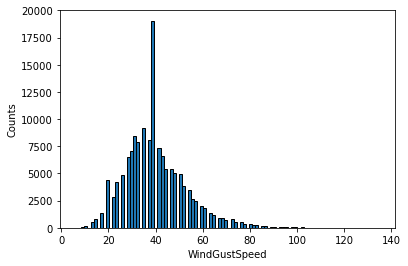

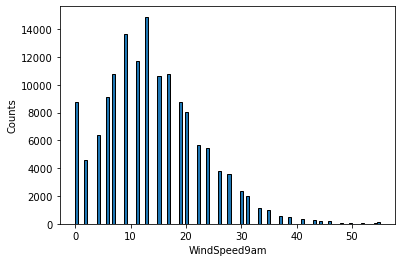

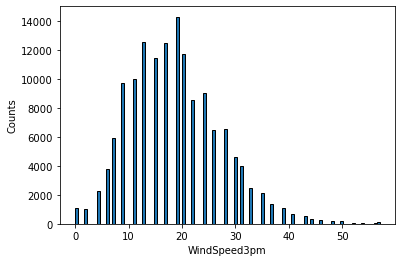

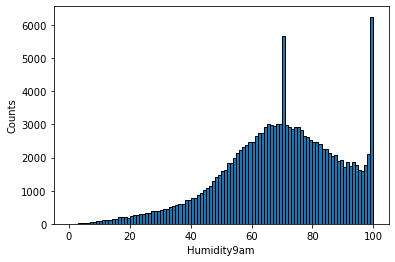

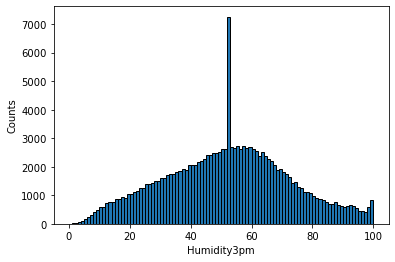

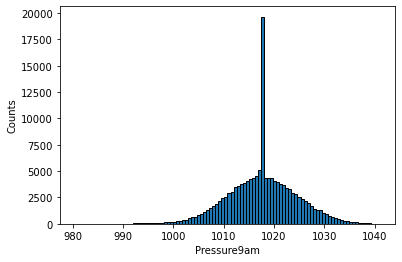

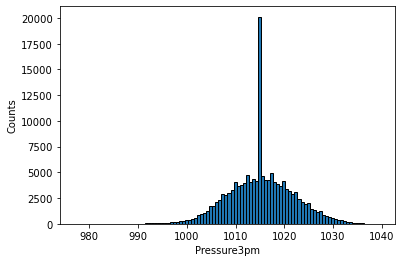

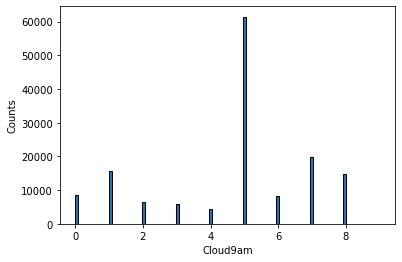

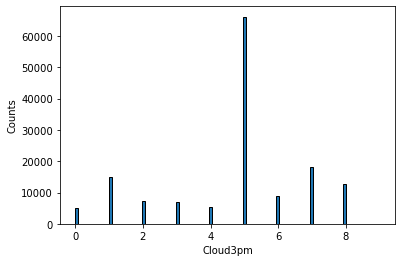

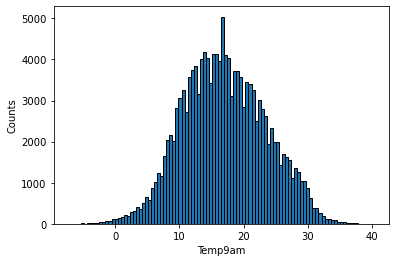

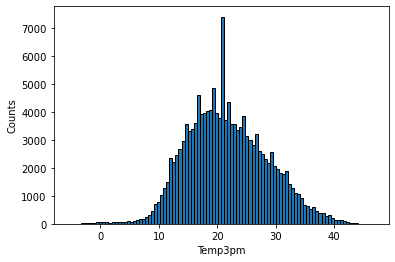

In [31]:
# Visualizing Continuous Features after clamping the Outliers
for x in df[cont_var]:
  plt.hist(df[x], bins = 100, edgecolor='black')
  plt.xlabel(x)
  plt.ylabel("Counts")
  plt.show()

# Data Normalization

In [32]:
df[cat_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [33]:
#Normalization for contnuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cont_var] = scaler.fit_transform(df[cont_var])
df[cont_var].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.1875,0.220183,0.57931,0.294574,0.363636,0.421053,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073
1,0.375000,0.565217,0.0000,0.220183,0.57931,0.294574,0.072727,0.385965,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058
2,0.504717,0.576560,0.0000,0.220183,0.57931,0.310078,0.345455,0.456140,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.0000,0.220183,0.57931,0.139535,0.200000,0.157895,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284
4,0.613208,0.701323,0.3125,0.220183,0.57931,0.271318,0.127273,0.350877,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704


# Data Transformations

In [34]:
# One-Hot Encoding Location, WindGustDir, WindDir9am and WindDir3pm features
df_loc = pd.get_dummies(df.Location, drop_first=True)

df_wg = pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True)

df_wd9 = pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True)

df_wd3 = pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True)

In [35]:
# Label Encoding RainToday and RainTomorrow features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [36]:
df = df.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_enc = pd.concat([df,df_loc, df_wg, df_wd9, df_wd3], axis = 1)

In [37]:
df_enc.isnull().sum()

Date           0
MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
              ..
SW             0
W              0
WNW            0
WSW            0
NaN            0
Length: 115, dtype: int64

In [38]:
df_enc

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,2008-12-01,0.516509,0.523629,0.1875,0.220183,0.57931,0.294574,0.363636,0.421053,0.71,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,0.375000,0.565217,0.0000,0.220183,0.57931,0.294574,0.072727,0.385965,0.44,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,0.504717,0.576560,0.0000,0.220183,0.57931,0.310078,0.345455,0.456140,0.38,...,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,0.417453,0.620038,0.0000,0.220183,0.57931,0.139535,0.200000,0.157895,0.45,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,0.613208,0.701323,0.3125,0.220183,0.57931,0.271318,0.127273,0.350877,0.82,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,0.266509,0.533081,0.0000,0.220183,0.57931,0.193798,0.236364,0.192982,0.51,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,0.285377,0.568998,0.0000,0.220183,0.57931,0.124031,0.236364,0.157895,0.56,...,0,0,0,0,0,0,0,0,0,0
145457,2017-06-23,0.327830,0.599244,0.0000,0.220183,0.57931,0.240310,0.163636,0.157895,0.53,...,0,0,0,0,0,0,0,1,0,0
145458,2017-06-24,0.384434,0.601134,0.0000,0.220183,0.57931,0.170543,0.236364,0.122807,0.51,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_enc.shape

(145460, 115)

In [40]:
df_enc.to_csv('Processed_Weather_Data.csv')

# Feature Selection

In [41]:
from sklearn.model_selection import train_test_split # To split data
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selection with Cross Validation
from sklearn.decomposition import PCA # To apply PCA

# To plot inline
%matplotlib inline

In [42]:
y = df['RainTomorrow']

In [43]:
X = df_enc.drop(columns = ['Date','RainTomorrow'])

In [44]:
X1 = df.drop(columns = ['Date', 'RainTomorrow'])

In [45]:
UnivariateFeatureSelection = SelectKBest(chi2, k=5).fit(X, y)

In [46]:
dic = {key:value for (key, value) in zip(UnivariateFeatureSelection.scores_, X.columns)}
sorted(dic.items(), reverse=True)

[(10617.40077202912, 'RainToday'),
 (10167.672808723586, 'Rainfall'),
 (2218.641383006436, 'Humidity3pm'),
 (1286.2896360835502, 'Cloud3pm'),
 (1076.9953277251475, 'Cloud9am'),
 (974.2223350144237, 'Sunshine'),
 (474.42138931083963, 'Humidity9am'),
 (406.3375938012192, 'Woomera'),
 (368.4923147289704, 'Portland'),
 (342.6637355925192, 'AliceSprings'),
 (277.01192791691005, 'WindGustSpeed'),
 (214.5973806664779, 'Mildura'),
 (170.57724557255324, 'Temp3pm'),
 (156.29995193132044, 'Pressure9am'),
 (154.82260617994152, 'Cairns'),
 (145.17956450830053, 'Cobar'),
 (136.80795112913367, 'Moree'),
 (133.91461156741556, 'Dartmoor'),
 (130.87222509445562, 'NorfolkIsland'),
 (123.82013271606843, 'MountGambier'),
 (121.70476152701578, 'Pressure3pm'),
 (120.81671738583185, 'MaxTemp'),
 (110.80930324966154, 'WindSpeed9am'),
 (106.8795221066139, 'Albany'),
 (95.02693493232118, 'Evaporation'),
 (85.31237984103612, 'CoffsHarbour'),
 (73.14159030603446, 'WindSpeed3pm'),
 (67.1206166712695, 'SalmonGums'),

In [47]:
# Principal Component Analysis
pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'Variance Ratio')

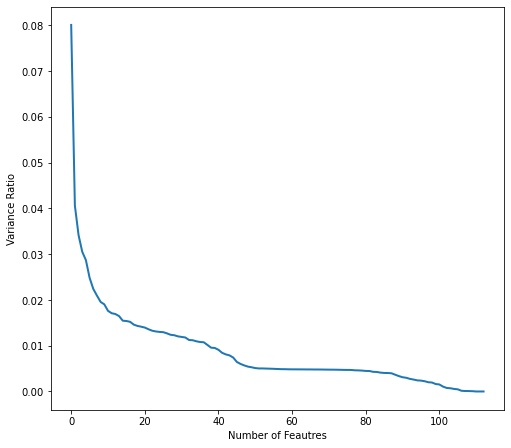

In [48]:
# Plotting to visualize the best number of elements
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression(max_iter = 10000)
rfe = RFE(model, 10)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 10
Selected Features: [False  True False False  True  True False  True False  True  True  True
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
Feature Ranking: [  7   1   2  60   1   1   5   1  43   1   1   1  88   1  21   1  58  32
  96  25  48  19  45  70  24  38  64  33  40  13  22   6  11  18  10   9
  29  31  36   1  41  28   8  12  35  44  74  86  72  34  46  14  73  37
  26   4  65  30  47  42  16  39  87   

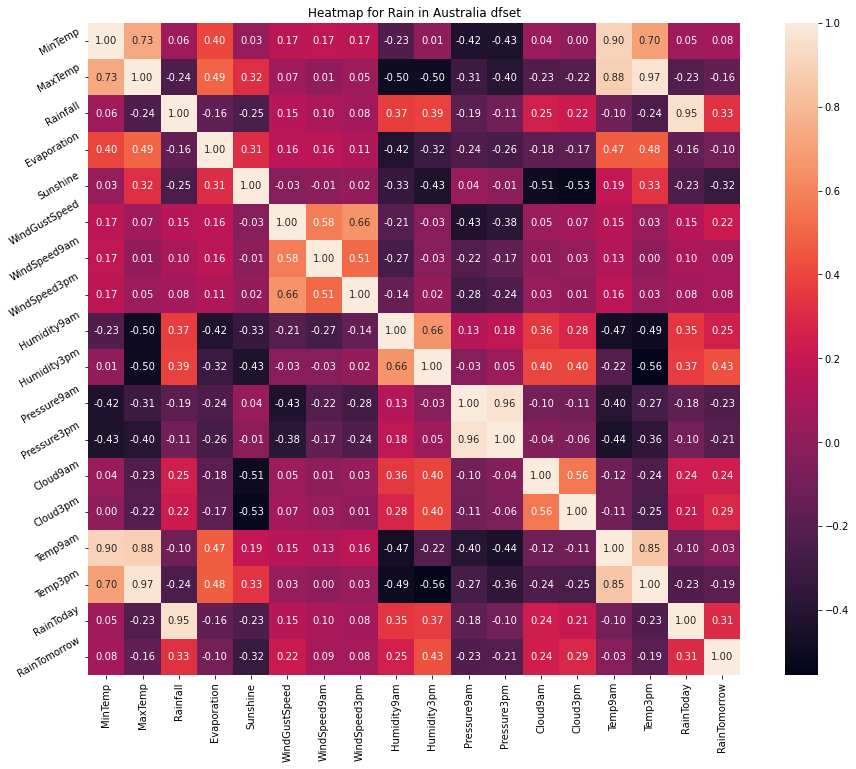

In [50]:
#Data Correlation Visualization
correlation = df.corr()

#Heatmap
plt.figure(figsize=(16,12))
plt.title('Heatmap for Rain in Australia dfset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()